<a href="https://colab.research.google.com/github/LuisMantilla28/Regresion/blob/main/Redes_neuronales_para_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para realizar el código nos hemos basado en la [página web](https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/) y en la librería sklearn de python (ver [página del *Multi-layer Perceptron regressor* en sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)).

In [1]:
import pandas as pd # Descargamos todos los paquetes y librerías que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad.csv


In [4]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1') # Cargar los datos con pandas
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-4-a3cc8ca395e3>:2: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1') # Cargar los datos con pandas


,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America
4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,5.001022e+10,1,3400,50,25/09/2012,...,1,5,NaN,NaN,NaN,24,99,9,Enciso,08 Villa Hermosa


In [5]:
sin_atipicos = tabla[(tabla["peso_nac"] < 6000) & (tabla["t_ges"] < 50)] #Quitamos los valores atipicos
print(sin_atipicos.head())

    areanac  cod_insp  sit_parto otro_sit  \
id                                          
1         1       NaN          1      NaN   
2         1       NaN          1      NaN   
3         1       NaN          1      NaN   
4         1       NaN          1      NaN   
5         1       NaN          1      NaN   

                                             nom_inst      cod_inst  sexo  \
id                                                                          
1                   PROMOTORA MEDICA LAS AMERICAS S.A  5.001021e+10     2   
2                              CLINICA DEL PRADO S.A.  5.001046e+10     2   
3                   CLINICA UNIVERSITARIA BOLIVARIANA  5.001034e+10     2   
4   UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   
5   UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   

    peso_nac  talla_nac   fecha_nac  ...  n_emb  seg_social  idclasadmi  \
id                                   ...                             

In [6]:
df = sin_atipicos[["peso_nac", "t_ges", "edad_madre", "edad_padre"]]
df

,peso_nac,t_ges,edad_madre,edad_padre
id,,,,
1,1070,30,39,42
2,2900,40,21,25
3,2510,36,37,34
4,3400,41,22,24
5,3760,39,40,41
...,...,...,...,...
196725,3150,40,33,36
196726,2310,36,31,42
196727,2600,36,29,33


In [8]:
x = df[["t_ges", "edad_madre", "edad_padre"]]
y = df["peso_nac"]
print(x.head(3))

    t_ges  edad_madre  edad_padre
id                               
1      30          39          42
2      40          21          25
3      36          37          34


In [10]:
print(y.head(3))

id
1    1070
2    2900
3    2510
Name: peso_nac, dtype: int64


In [11]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=0) #tomar los datos para entrenmiento y prueba (por lo general se toma entre el 20 y 30 % pdatos para entrenar)
sc=StandardScaler() # Estandarizar una variable con una distribución normal ( Mostrar que las variables presntan normalidad sirve cuando queremos hacer intervalos de confianza, no es necesariamente para el modelo)
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
testX = testX.to_numpy()

In [20]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(15,10,50,35), #Capas ocultas
                       max_iter = 500,activation = 'relu',
                       solver = 'lbfgs', learning_rate='invscaling') #Aqui hacemos la red neuronal perseptron multicapa
mlp_reg.fit(trainX_scaled, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(15, 10, 50, 35), learning_rate='invscaling',
             max_iter=500, solver='lbfgs')

In [21]:
y_pred = mlp_reg.predict(testX_scaled) #Predecimos los valores para testiar
y_pred

array([3286.60495475, 2394.94839044, 3090.86512565, ..., 3353.81179434,
       2880.2077188 , 3223.87287084])

In [22]:
#Hagamos un modelo de regresión lineal multiple
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(trainX_scaled, trainY) #Estimación de parámetros para los datos
y_predlineal = modelo.predict(testX_scaled)
y_predlineal

array([3337.27513388, 2454.68876546, 3020.2533567 , ..., 3414.67546693,
       2844.44066744, 3185.73768861])

In [23]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted n': y_pred, 'Predicted l': y_predlineal}) #Predicciones y real
df_temp.head()

,Actual,Predicted n,Predicted l
id,,,
32582,3115,3286.604955,3337.275134
67431,2010,2394.948390,2454.688765
100180,2710,3090.865126,3020.253357
116695,3010,3058.831187,3000.775797
51549,3620,3309.294660,3351.827533


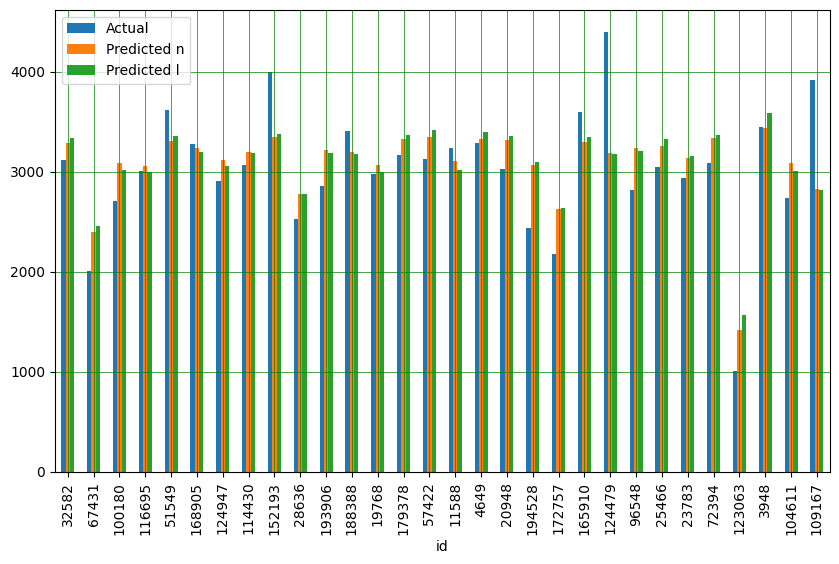

In [24]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error n:', metrics.mean_absolute_error(testY, y_pred),
      'Mean Absolute Error l:', metrics.mean_absolute_error(testY, y_predlineal)) #Error en valor absoluto
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred),
      'Mean Squared Error l:', metrics.mean_squared_error(testY, y_predlineal)) # Error al cuadrado

Mean Absolute Error n: 282.3581863128484 Mean Absolute Error l: 286.5083018690251
Mean Squared Error: 129376.35490810254 Mean Squared Error l: 133026.69058410602


La interpretación de la **curva de pérdida** depende del tipo de gráfico obtenido. \\

En la primera figura se observa que no hay convergencia. Esto indica que se debe reducir la tasa de aprendizaje para evitar que el modelo rebote en el espacio de parámetros. También indica que se podría simplificar el modelo, y luego, se puede agregar complejidad de manera gradual.

Saving noconv.png to noconv (2).png


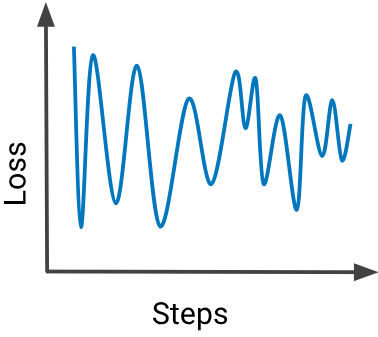

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('noconv.png')

Por lo general, un gran aumento en la pérdida se debe a valores anómalos en los datos de entrada. Las posibles causas son: (1) *NaN* en los datos de entrada. (2) Un gradiente con alto crecimiento debido a datos anómalos. (3) Datos con logaritmo cero o números negativos.

Saving noconv1.png to noconv1.png


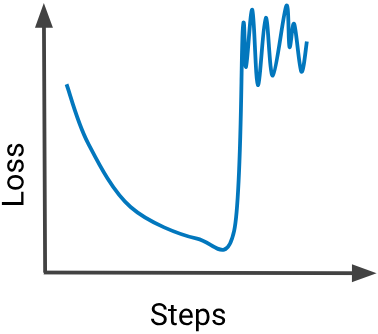

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('noconv1.png')

La siguiente es la gráfica de una curva de pérdida para un modelo adecuado para nuestro conjunto de datos. La información ha sido tomada del siguiente [link](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic?hl=es-419)

Saving conv.png to conv.png


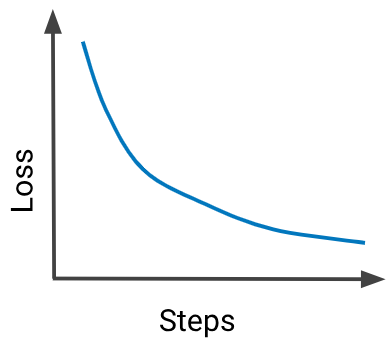

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
from IPython.display import Image
Image('conv.png')

In [26]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

AttributeError: ignored